In [1]:
import sys
import os
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.insert(0, project_root)
sys.path.insert(0, os.path.join(project_root, 'src'))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

from src.data.data_loader import YahooDataLoader
from config.settings import DataConfig

plt.rcParams['figure.figsize'] = (18, 12)

# Data Preparation

In [2]:
data_config = DataConfig(
    timeframes=["1h"],
    symbols=["SPY"],
    cache_enabled=True,
    cache_dir="../data/cache"
)

data_loader = YahooDataLoader(data_config)

end_date = datetime.now()
start_date = end_date - timedelta(days=365)

print(f"Loading price data for SPY from {start_date.strftime('%Y-%m-%d')} to {end_date.strftime('%Y-%m-%d')}")

Loading price data for SPY from 2024-09-14 to 2025-09-14


In [ ]:
symbol = "SPY"
timeframe = "1h"

spy_prices_df = data_loader.load_data(
    symbol=symbol,
    start_date=start_date,
    end_date=end_date,
    timeframe=timeframe
)

print(f"Successfully loaded {len(spy_prices_df)} rows of {timeframe} data for {symbol}")
print(f"Date range: {spy_prices_df.index.min()} to {spy_prices_df.index.max()}")
print(f"\nData shape: {spy_prices_df.shape}")
print(f"\nColumns: {list(spy_prices_df.columns)}")

Successfully loaded 1731 rows of 1h data for SPY
Date range: 2024-09-16 09:30:00-04:00 to 2025-09-12 15:30:00-04:00

Data shape: (1731, 8)

Columns: ['open', 'high', 'low', 'close', 'volume', 'dividends', 'stock splits', 'capital gains']


In [8]:
spy_prices_df.head()

,open,high,low,close,volume,dividends,stock splits,capital gains
Datetime,,,,,,,,
2024-09-16 09:30:00-04:00,561.750000,562.919983,560.859985,561.478821,6951743,0.0,0.0,0.0
2024-09-16 10:30:00-04:00,560.909973,561.539978,559.900024,560.830017,5125936,0.0,0.0,0.0
2024-09-16 11:30:00-04:00,560.820007,561.419983,560.340027,561.389893,3354915,0.0,0.0,0.0
2024-09-16 12:30:00-04:00,561.380005,561.909973,560.789978,561.715027,3311704,0.0,0.0,0.0
2024-09-16 13:30:00-04:00,561.710022,562.599976,561.609985,562.549988,3520039,0.0,0.0,0.0


In [9]:
spy_prices_df.describe()

,open,high,low,close,volume,dividends,stock splits,capital gains
count,1731.000000,1731.000000,1731.000000,1731.000000,1.731000e+03,1731.000000,1731.0,1731.0
mean,593.106973,594.278229,591.921879,593.129957,7.696235e+06,0.004142,0.0,0.0
std,30.334463,29.751906,30.750347,30.316240,5.299099e+06,0.086223,0.0,0.0
min,489.190002,497.589996,481.799988,493.790009,1.422477e+06,0.000000,0.0,0.0
25%,572.884979,574.104980,571.872894,572.889984,4.466555e+06,0.000000,0.0,0.0
50%,593.864990,595.159973,592.679993,593.895020,6.508879e+06,0.000000,0.0,0.0
75%,607.700012,608.279999,607.134979,607.709930,9.436520e+06,0.000000,0.0,0.0
max,658.505005,659.109985,658.070007,658.505005,9.226401e+07,1.966000,0.0,0.0


In [11]:
spy_returns_df = pd.DataFrame(index=spy_prices_df.index)

spy_returns_df['open_return'] = spy_prices_df['open'].pct_change() * 100
spy_returns_df['high_return'] = spy_prices_df['high'].pct_change() * 100
spy_returns_df['low_return'] = spy_prices_df['low'].pct_change() * 100
spy_returns_df['close_return'] = spy_prices_df['close'].pct_change() * 100

spy_returns_df['intrabar_return'] = ((spy_prices_df['high'] - spy_prices_df['low']) / spy_prices_df['open']) * 100

spy_returns_df['body_return'] = ((spy_prices_df['close'] - spy_prices_df['open']) / spy_prices_df['open']) * 100

spy_returns_df = spy_returns_df.dropna()

print(f"Returns data shape: {spy_returns_df.shape}")

Returns data shape: (1730, 6)


In [12]:
spy_returns_df.head()

,open_return,high_return,low_return,close_return,intrabar_return,body_return
Datetime,,,,,,
2024-09-16 10:30:00-04:00,-0.149537,-0.245151,-0.171159,-0.115553,0.292374,-0.014255
2024-09-16 11:30:00-04:00,-0.016039,-0.021369,0.078586,0.099830,0.192567,0.101616
2024-09-16 12:30:00-04:00,0.099853,0.087277,0.080300,0.057916,0.199507,0.059678
2024-09-16 13:30:00-04:00,0.058787,0.122796,0.146224,0.148645,0.176246,0.149537
2024-09-16 14:30:00-04:00,0.147755,0.021329,0.040961,-0.051547,0.156423,-0.049769


In [13]:
spy_returns_df.describe()

,open_return,high_return,low_return,close_return,intrabar_return,body_return
count,1730.000000,1730.000000,1730.000000,1730.000000,1730.000000,1730.000000
mean,0.010139,0.009832,0.010110,0.010053,0.407870,0.004661
std,0.443746,0.397052,0.440774,0.433127,0.416485,0.333041
min,-4.179969,-3.126474,-4.605395,-3.971065,0.063532,-2.271798
25%,-0.124788,-0.096909,-0.112939,-0.115333,0.195933,-0.113575
50%,0.018200,0.006547,0.020989,0.013581,0.294406,0.009932
75%,0.152708,0.110504,0.148221,0.140680,0.486375,0.129707
max,4.974061,6.562788,4.873161,4.947324,8.456836,4.962042


## Prices Analysis

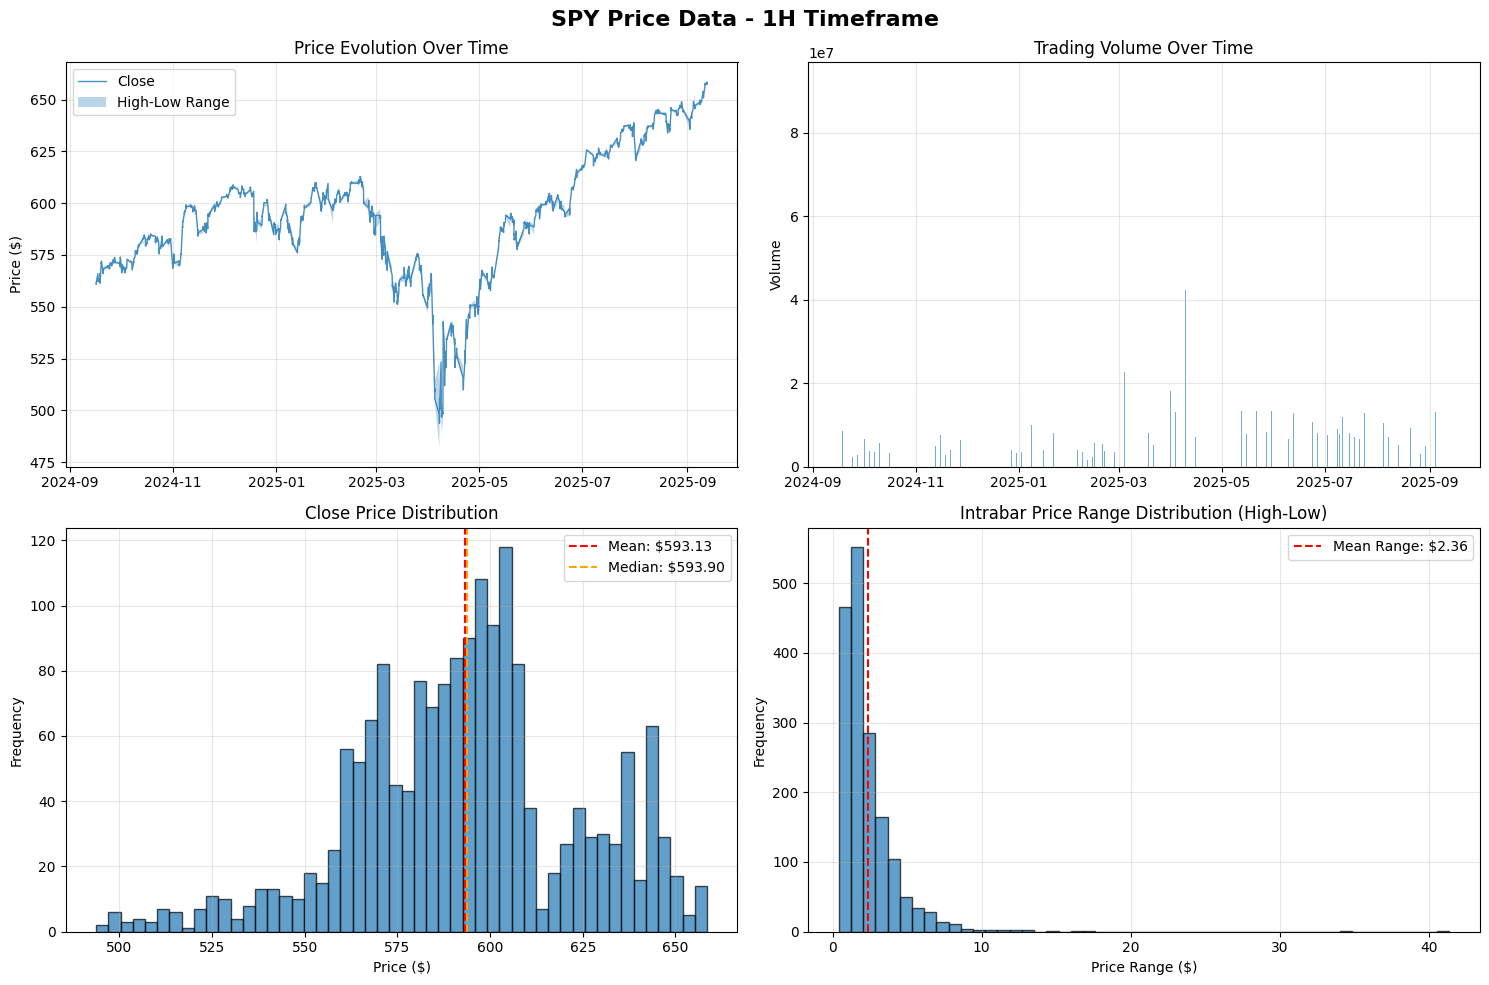

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle(f'{symbol} Price Data - 1H Timeframe', fontsize=16, fontweight='bold')

axes[0, 0].plot(spy_prices_df.index, spy_prices_df['close'], label='Close', alpha=0.8, linewidth=1)
axes[0, 0].fill_between(spy_prices_df.index, spy_prices_df['low'], spy_prices_df['high'], 
                       alpha=0.3, label='High-Low Range')
axes[0, 0].set_title('Price Evolution Over Time')
axes[0, 0].set_ylabel('Price ($)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].bar(spy_prices_df.index, spy_prices_df['volume'], alpha=0.6, width=0.02)
axes[0, 1].set_title('Trading Volume Over Time')
axes[0, 1].set_ylabel('Volume')
axes[0, 1].grid(True, alpha=0.3)

axes[1, 0].hist(spy_prices_df['close'], bins=50, alpha=0.7, edgecolor='black')
axes[1, 0].axvline(spy_prices_df['close'].mean(), color='red', linestyle='--', 
                  label=f'Mean: ${spy_prices_df["close"].mean():.2f}')
axes[1, 0].axvline(spy_prices_df['close'].median(), color='orange', linestyle='--', 
                  label=f'Median: ${spy_prices_df["close"].median():.2f}')
axes[1, 0].set_title('Close Price Distribution')
axes[1, 0].set_xlabel('Price ($)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

price_range = spy_prices_df['high'] - spy_prices_df['low']
axes[1, 1].hist(price_range, bins=50, alpha=0.7, edgecolor='black')
axes[1, 1].axvline(price_range.mean(), color='red', linestyle='--', 
                  label=f'Mean Range: ${price_range.mean():.2f}')
axes[1, 1].set_title('Intrabar Price Range Distribution (High-Low)')
axes[1, 1].set_xlabel('Price Range ($)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [15]:
print(f"Price Statistics for {symbol}:")
print(f"Close Price - Mean: ${spy_prices_df['close'].mean():.2f}, Std: ${spy_prices_df['close'].std():.2f}")
print(f"Price Range - Mean: ${price_range.mean():.2f}, Std: ${price_range.std():.2f}")
print(f"Volume - Mean: {spy_prices_df['volume'].mean():,.0f}, Std: {spy_prices_df['volume'].std():,.0f}")

Price Statistics for SPY:
Close Price - Mean: $593.13, Std: $30.32
Price Range - Mean: $2.36, Std: $2.16
Volume - Mean: 7,696,235, Std: 5,299,099


## Returns Analysis

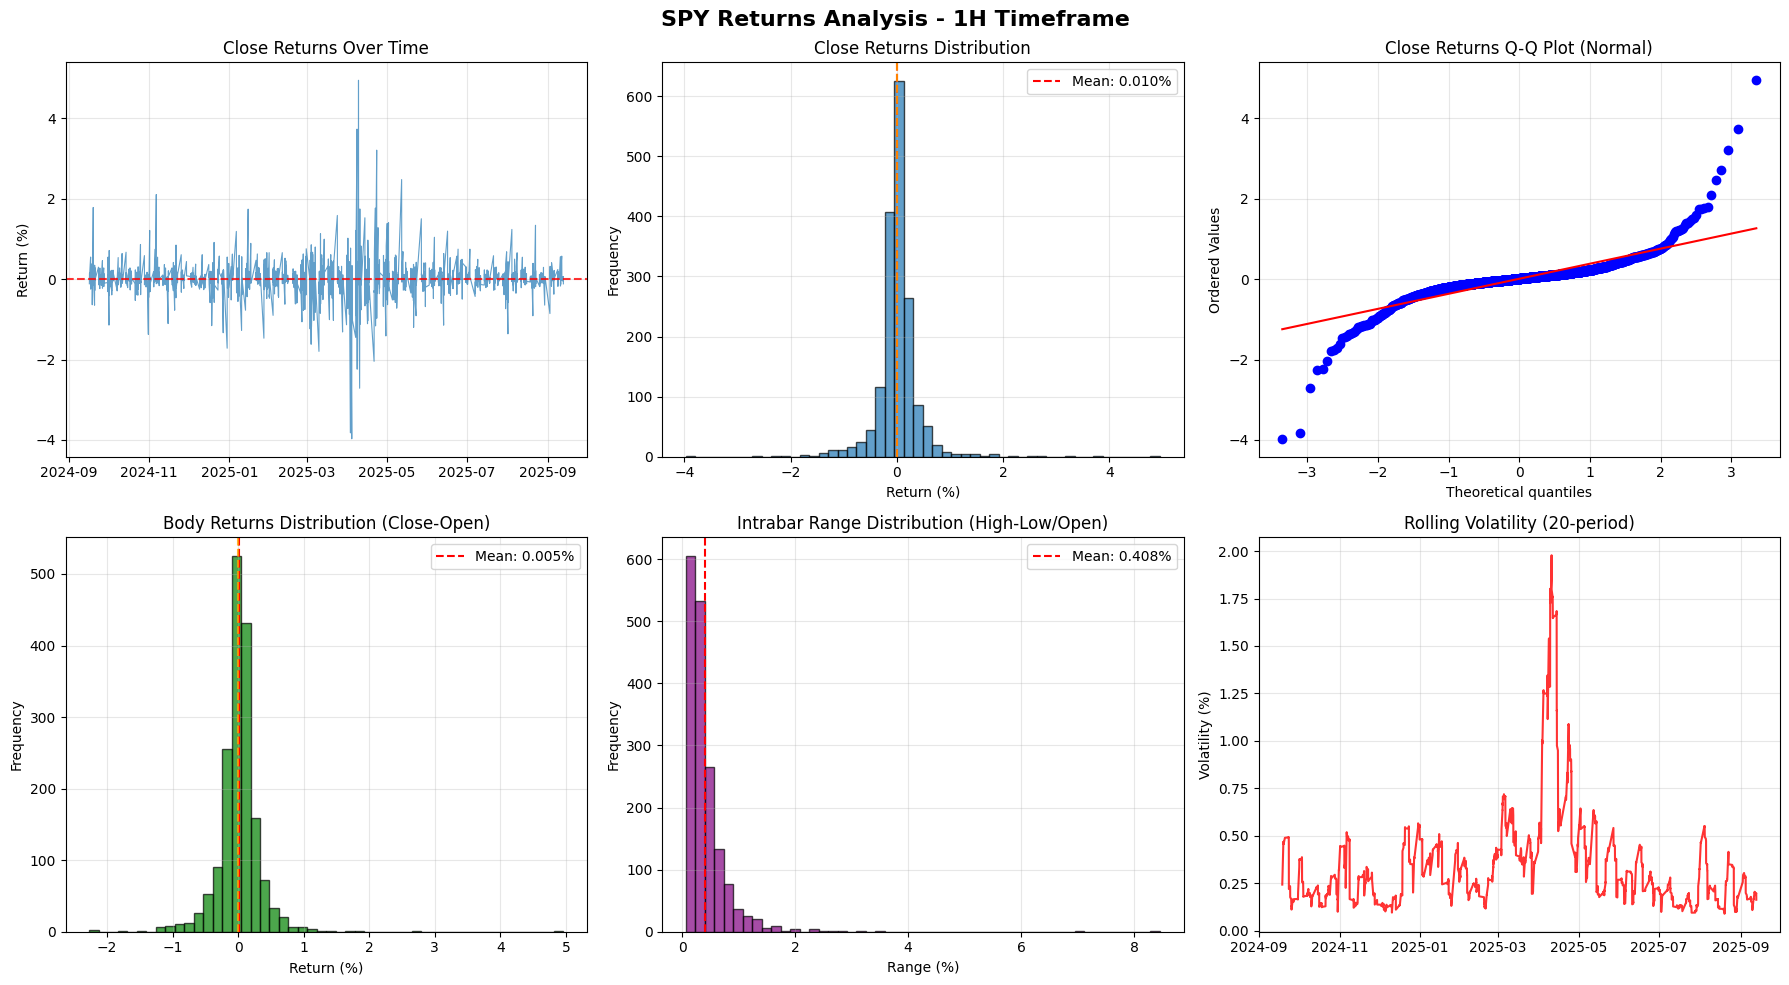

In [16]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle(f'{symbol} Returns Analysis - 1H Timeframe', fontsize=16, fontweight='bold')

axes[0, 0].plot(spy_returns_df.index, spy_returns_df['close_return'], alpha=0.7, linewidth=0.8)
axes[0, 0].axhline(y=0, color='red', linestyle='--', alpha=0.8)
axes[0, 0].set_title('Close Returns Over Time')
axes[0, 0].set_ylabel('Return (%)')
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].hist(spy_returns_df['close_return'], bins=50, alpha=0.7, edgecolor='black')
axes[0, 1].axvline(spy_returns_df['close_return'].mean(), color='red', linestyle='--', 
                  label=f'Mean: {spy_returns_df["close_return"].mean():.3f}%')
axes[0, 1].axvline(0, color='orange', linestyle='--', alpha=0.8)
axes[0, 1].set_title('Close Returns Distribution')
axes[0, 1].set_xlabel('Return (%)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

from scipy import stats
stats.probplot(spy_returns_df['close_return'].dropna(), dist="norm", plot=axes[0, 2])
axes[0, 2].set_title('Close Returns Q-Q Plot (Normal)')
axes[0, 2].grid(True, alpha=0.3)

axes[1, 0].hist(spy_returns_df['body_return'], bins=50, alpha=0.7, edgecolor='black', color='green')
axes[1, 0].axvline(spy_returns_df['body_return'].mean(), color='red', linestyle='--', 
                  label=f'Mean: {spy_returns_df["body_return"].mean():.3f}%')
axes[1, 0].axvline(0, color='orange', linestyle='--', alpha=0.8)
axes[1, 0].set_title('Body Returns Distribution (Close-Open)')
axes[1, 0].set_xlabel('Return (%)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].hist(spy_returns_df['intrabar_return'], bins=50, alpha=0.7, edgecolor='black', color='purple')
axes[1, 1].axvline(spy_returns_df['intrabar_return'].mean(), color='red', linestyle='--', 
                  label=f'Mean: {spy_returns_df["intrabar_return"].mean():.3f}%')
axes[1, 1].set_title('Intrabar Range Distribution (High-Low/Open)')
axes[1, 1].set_xlabel('Range (%)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

rolling_vol = spy_returns_df['close_return'].rolling(window=20).std()
axes[1, 2].plot(rolling_vol.index, rolling_vol, alpha=0.8, color='red')
axes[1, 2].set_title('Rolling Volatility (20-period)')
axes[1, 2].set_ylabel('Volatility (%)')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [19]:
close_returns = spy_returns_df['close_return']
body_returns = spy_returns_df['body_return']
intrabar_returns = spy_returns_df['intrabar_return']

In [20]:
print(f"1. CLOSE RETURNS STATISTICS:")
print(f"   Mean Return: {close_returns.mean():.4f}%")
print(f"   Std Deviation: {close_returns.std():.4f}%")
print(f"   Skewness: {close_returns.skew():.4f}")
print(f"   Kurtosis: {close_returns.kurtosis():.4f}")
print(f"   Min Return: {close_returns.min():.4f}%")
print(f"   Max Return: {close_returns.max():.4f}%")
print(f"   Sharpe Ratio (assuming 252*24 periods/year): {(close_returns.mean() / close_returns.std()) * np.sqrt(252*24):.4f}")

1. CLOSE RETURNS STATISTICS:
   Mean Return: 0.0101%
   Std Deviation: 0.4331%
   Skewness: 0.4656
   Kurtosis: 26.9264
   Min Return: -3.9711%
   Max Return: 4.9473%
   Sharpe Ratio (assuming 252*24 periods/year): 1.8051


In [21]:
print(f"2. BODY RETURNS STATISTICS (Close-Open):")
print(f"   Mean Return: {body_returns.mean():.4f}%")
print(f"   Std Deviation: {body_returns.std():.4f}%")
print(f"   Skewness: {body_returns.skew():.4f}")
print(f"   Kurtosis: {body_returns.kurtosis():.4f}")

2. BODY RETURNS STATISTICS (Close-Open):
   Mean Return: 0.0047%
   Std Deviation: 0.3330%
   Skewness: 1.7324
   Kurtosis: 35.6094


In [22]:
print(f"3. INTRABAR RANGE STATISTICS (High-Low/Open):")
print(f"   Mean Range: {intrabar_returns.mean():.4f}%")
print(f"   Std Deviation: {intrabar_returns.std():.4f}%")
print(f"   Min Range: {intrabar_returns.min():.4f}%")
print(f"   Max Range: {intrabar_returns.max():.4f}%")

3. INTRABAR RANGE STATISTICS (High-Low/Open):
   Mean Range: 0.4079%
   Std Deviation: 0.4165%
   Min Range: 0.0635%
   Max Range: 8.4568%


In [23]:
print(f"4. RISK METRICS:")
print(f"   Value at Risk (1%): {np.percentile(close_returns, 1):.4f}%")
print(f"   Value at Risk (5%): {np.percentile(close_returns, 5):.4f}%")
print(f"   Expected Shortfall (1%): {close_returns[close_returns <= np.percentile(close_returns, 1)].mean():.4f}%")
print(f"   Expected Shortfall (5%): {close_returns[close_returns <= np.percentile(close_returns, 5)].mean():.4f}%")

4. RISK METRICS:
   Value at Risk (1%): -1.2660%
   Value at Risk (5%): -0.5267%
   Expected Shortfall (1%): -1.9411%
   Expected Shortfall (5%): -1.0574%


In [24]:
print(f"5. DISTRIBUTION ANALYSIS:")
positive_returns = (close_returns > 0).sum()
negative_returns = (close_returns < 0).sum()
zero_returns = (close_returns == 0).sum()
total_returns = len(close_returns)

print(f"   Positive Returns: {positive_returns} ({positive_returns/total_returns*100:.1f}%)")
print(f"   Negative Returns: {negative_returns} ({negative_returns/total_returns*100:.1f}%)")
print(f"   Zero Returns: {zero_returns} ({zero_returns/total_returns*100:.1f}%)")
print(f"   Win Rate: {positive_returns/(positive_returns+negative_returns)*100:.1f}%")

if positive_returns > 0 and negative_returns > 0:
    avg_win = close_returns[close_returns > 0].mean()
    avg_loss = close_returns[close_returns < 0].mean()
    profit_factor = abs(avg_win / avg_loss)
    print(f"   Average Win: {avg_win:.4f}%")
    print(f"   Average Loss: {avg_loss:.4f}%")
    print(f"   Profit Factor: {profit_factor:.4f}")

5. DISTRIBUTION ANALYSIS:
   Positive Returns: 914 (52.8%)
   Negative Returns: 812 (46.9%)
   Zero Returns: 4 (0.2%)
   Win Rate: 53.0%
   Average Win: 0.2356%
   Average Loss: -0.2437%
   Profit Factor: 0.9665


# Regime Detection

In [29]:
from src.regime_detection.hmm import GaussianMixtureRegimeDetector

We identify three market regimes:
- Bullish breakout: Strong upward momentum with high volatility
- Bearish breakout: Strong downward momentum with high volatility
- Trading range: Low volatility sideways movement

In [31]:
regime_detector = GaussianMixtureRegimeDetector(n_states=3, random_state=13)

In [33]:
hmm_features = regime_detector.prepare_features(spy_prices_df)

print(f"Feature matrix shape: {hmm_features.shape}")
print(f"Features include: returns, volatility, volume ratios, price ratios, RSI, momentum")
print(f"Training period: {len(hmm_features)} observations")

Feature matrix shape: (1711, 9)
Features include: returns, volatility, volume ratios, price ratios, RSI, momentum
Training period: 1711 observations


In [35]:
regime_detector.fit(hmm_features)
regime_characteristics = regime_detector.get_regime_characteristics()

print("\nRegime Characteristics:")
for regime_id, characteristics in regime_characteristics.items():
    print(f"\n{regime_id.upper()}:")
    print(f"  Weight: {characteristics['weight']:.3f}")
    print(f"  Mean Return: {characteristics['features']['returns']:.4f}")
    print(f"  Volatility: {characteristics['features']['volatility']:.4f}")
    print(f"  Volume Ratio: {characteristics['features']['volume_ratio']:.3f}")
    print(f"  RSI: {characteristics['features']['rsi']:.1f}")
    print(f"  Momentum: {characteristics['features']['momentum']:.4f}")


Regime Characteristics:

REGIME_0:
  Weight: 0.174
  Mean Return: 0.0032
  Volatility: 0.0038
  Volume Ratio: 1.342
  RSI: 56.0
  Momentum: 0.0037

REGIME_1:
  Weight: 0.073
  Mean Return: -0.0065
  Volatility: 0.0083
  Volume Ratio: 1.533
  RSI: 40.3
  Momentum: -0.0096

REGIME_2:
  Weight: 0.754
  Mean Return: 0.0000
  Volatility: 0.0030
  Volume Ratio: 0.888
  RSI: 55.8
  Momentum: 0.0014


In [36]:
regime_predictions = regime_detector.predict_regime(hmm_features)
regime_probabilities = regime_detector.get_regime_probabilities(hmm_features)

print(f"Predicted {len(regime_predictions)} regime states")

regime_start_idx = len(spy_prices_df) - len(regime_predictions)
regime_df = pd.DataFrame(index=spy_prices_df.index[regime_start_idx:])
regime_df['regime_state'] = regime_predictions
regime_df['regime_prob_0'] = regime_probabilities[:, 0]
regime_df['regime_prob_1'] = regime_probabilities[:, 1]
regime_df['regime_prob_2'] = regime_probabilities[:, 2]

print("\nRegime distribution:")
regime_counts = pd.Series(regime_predictions).value_counts().sort_index()
for state, count in regime_counts.items():
    pct = count / len(regime_predictions) * 100
    print(f"  Regime {state}: {count} observations ({pct:.1f}%)")

Predicted 1711 regime states

Regime distribution:
  Regime 0: 297 observations (17.4%)
  Regime 1: 120 observations (7.0%)
  Regime 2: 1294 observations (75.6%)


In [37]:
def map_regimes_to_labels(characteristics):
    regime_labels = {}

    for regime_id, props in characteristics.items():
        features = props['features']
        returns = features['returns']
        volatility = features['volatility']
        momentum = features['momentum']

        if volatility > 0.015 and returns > 0.003 and momentum > 0.01:
            label = "bullish_breakout"
        elif volatility > 0.015 and returns < -0.003 and momentum < -0.01:
            label = "bearish_breakout"
        elif volatility < 0.012 and abs(returns) < 0.002:
            label = "trading_range"
        elif returns > 0:
            label = "bullish_trend"
        else:
            label = "bearish_trend"

        regime_labels[regime_id] = label

    return regime_labels

regime_labels = map_regimes_to_labels(regime_characteristics)
print("\nRegime Label Mapping:")
for regime_id, label in regime_labels.items():
    print(f"  {regime_id} -> {label}")

state_to_label = {i: regime_labels[f'regime_{i}'] for i in range(3)}
regime_df['regime_label'] = regime_df['regime_state'].map(state_to_label)

print("\nRegime distribution by label:")
label_counts = regime_df['regime_label'].value_counts()
for label, count in label_counts.items():
    pct = count / len(regime_df) * 100
    print(f"  {label}: {count} observations ({pct:.1f}%)")


Regime Label Mapping:
  regime_0 -> bullish_trend
  regime_1 -> bearish_trend
  regime_2 -> trading_range

Regime distribution by label:
  trading_range: 1294 observations (75.6%)
  bullish_trend: 297 observations (17.4%)
  bearish_trend: 120 observations (7.0%)


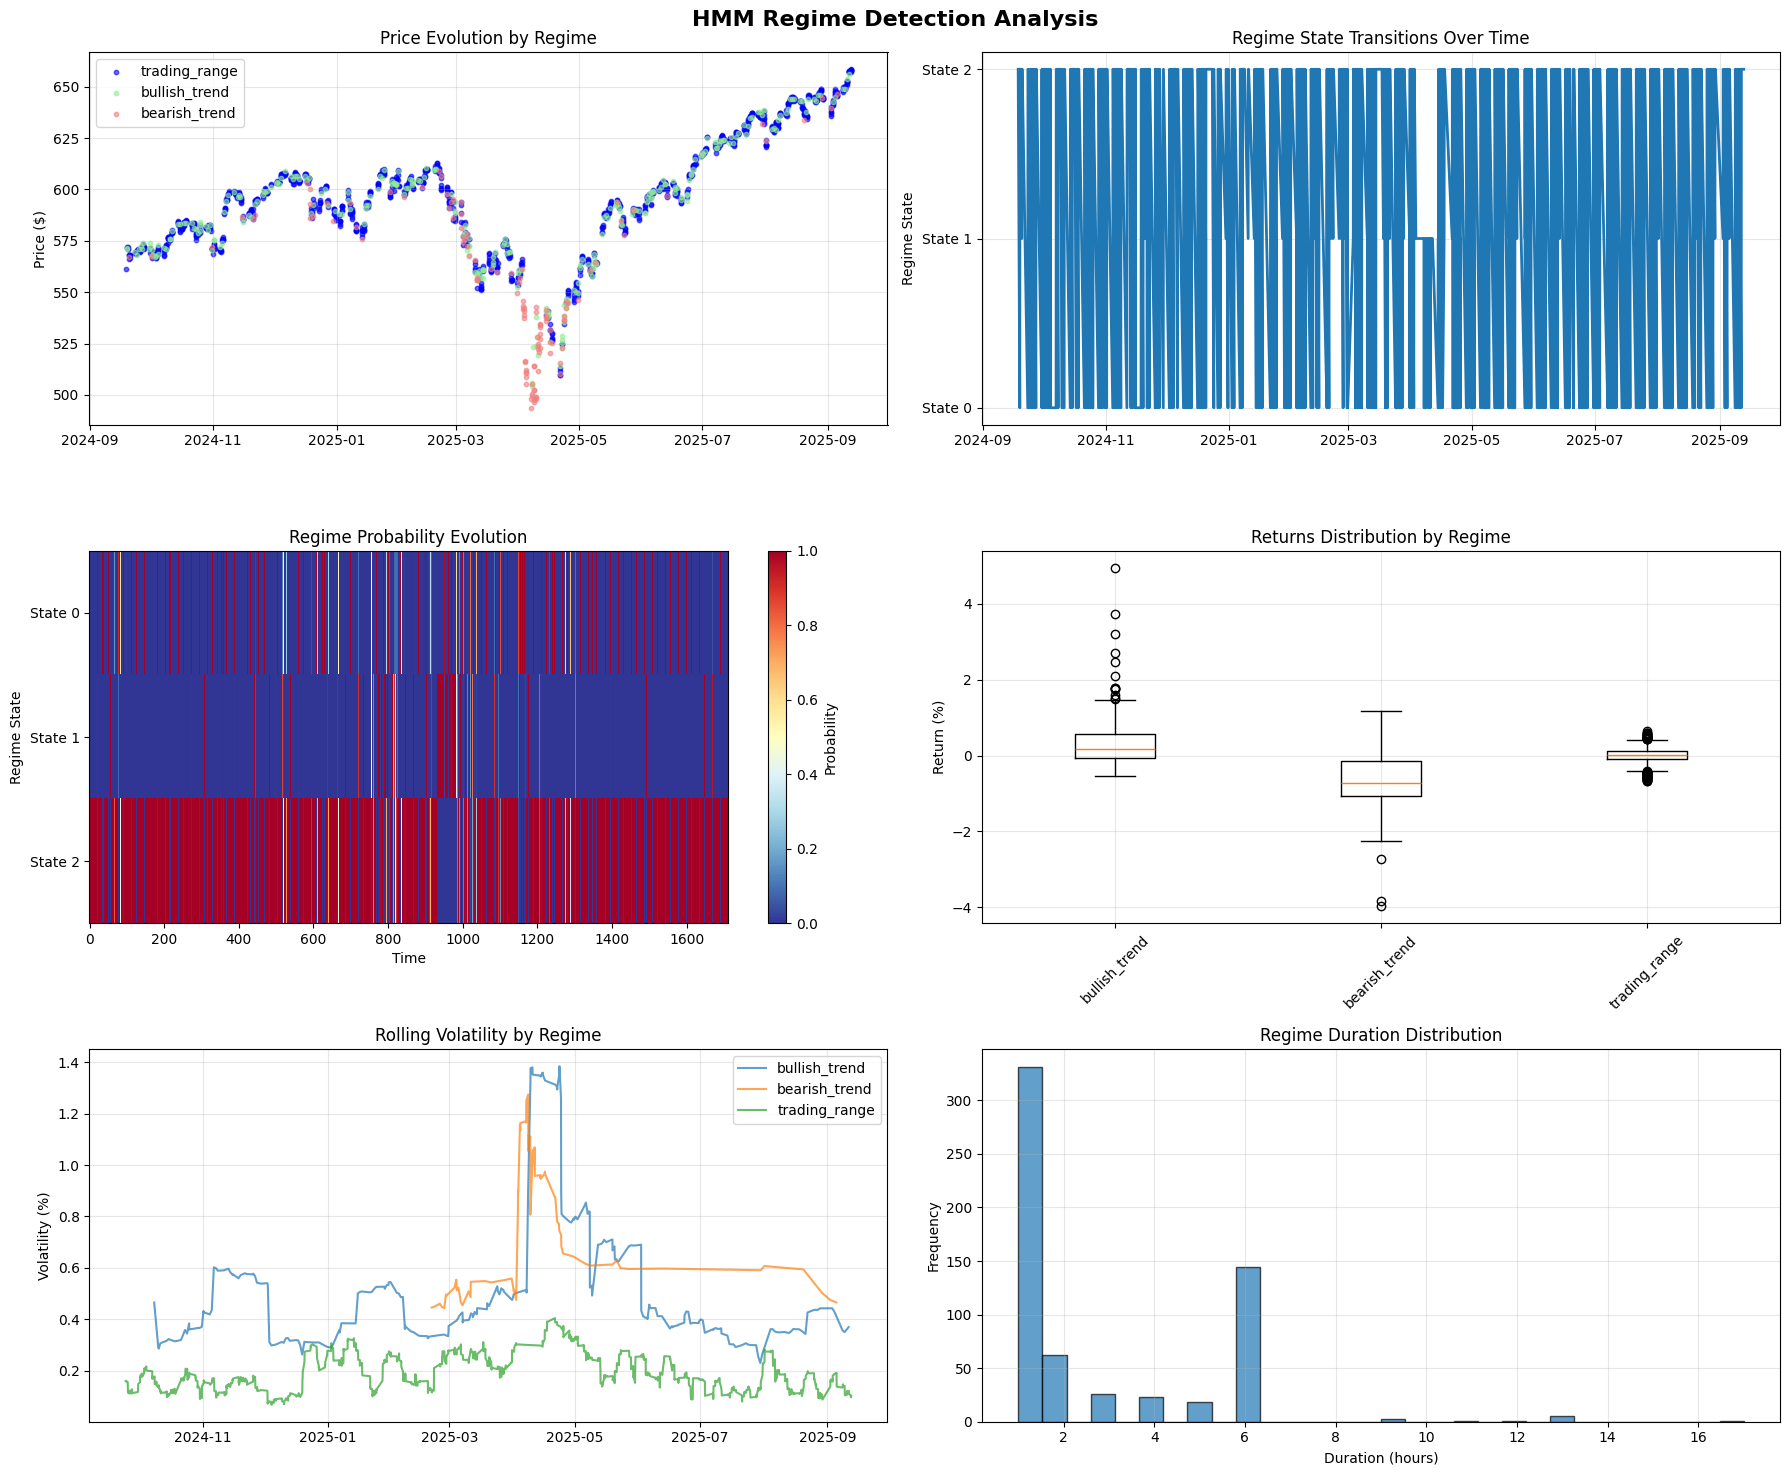

In [38]:
fig, axes = plt.subplots(3, 2, figsize=(18, 15))
fig.suptitle('HMM Regime Detection Analysis', fontsize=16, fontweight='bold')

ax = axes[0, 0]
regime_colors = {'bullish_breakout': 'green', 'bearish_breakout': 'red', 'trading_range': 'blue',
                'bullish_trend': 'lightgreen', 'bearish_trend': 'lightcoral'}

price_regime_df = spy_prices_df.iloc[regime_start_idx:].copy()
price_regime_df['regime_label'] = regime_df['regime_label']

for label, color in regime_colors.items():
    mask = price_regime_df['regime_label'] == label
    if mask.any():
        ax.scatter(price_regime_df[mask].index, price_regime_df[mask]['close'],
                  c=color, label=label, alpha=0.6, s=10)

ax.set_title('Price Evolution by Regime')
ax.set_ylabel('Price ($)')
ax.legend()
ax.grid(True, alpha=0.3)

ax = axes[0, 1]
ax.plot(regime_df.index, regime_df['regime_state'], linewidth=2)
ax.set_title('Regime State Transitions Over Time')
ax.set_ylabel('Regime State')
ax.set_yticks([0, 1, 2])
ax.set_yticklabels(['State 0', 'State 1', 'State 2'])
ax.grid(True, alpha=0.3)

ax = axes[1, 0]
prob_matrix = regime_df[['regime_prob_0', 'regime_prob_1', 'regime_prob_2']].values.T
im = ax.imshow(prob_matrix, aspect='auto', cmap='RdYlBu_r', interpolation='nearest')
ax.set_title('Regime Probability Evolution')
ax.set_ylabel('Regime State')
ax.set_xlabel('Time')
ax.set_yticks([0, 1, 2])
ax.set_yticklabels(['State 0', 'State 1', 'State 2'])
plt.colorbar(im, ax=ax, label='Probability')

ax = axes[1, 1]
returns_regime_df = spy_returns_df.iloc[regime_start_idx:].copy()
returns_regime_df['regime_label'] = regime_df['regime_label']

regime_returns = []
regime_names = []
for label in regime_labels.values():
    if label in returns_regime_df['regime_label'].values:
        regime_returns.append(returns_regime_df[returns_regime_df['regime_label'] == label]['close_return'].values)
        regime_names.append(label)

ax.boxplot(regime_returns, labels=regime_names)
ax.set_title('Returns Distribution by Regime')
ax.set_ylabel('Return (%)')
ax.tick_params(axis='x', rotation=45)
ax.grid(True, alpha=0.3)

ax = axes[2, 0]
for label in regime_labels.values():
    if label in returns_regime_df['regime_label'].values:
        regime_data = returns_regime_df[returns_regime_df['regime_label'] == label]
        rolling_vol = regime_data['close_return'].rolling(window=20).std()
        ax.plot(regime_data.index, rolling_vol, label=label, alpha=0.7)

ax.set_title('Rolling Volatility by Regime')
ax.set_ylabel('Volatility (%)')
ax.legend()
ax.grid(True, alpha=0.3)

ax = axes[2, 1]
regime_changes = regime_df['regime_state'].diff().fillna(0) != 0
regime_durations = []
current_regime = regime_df['regime_state'].iloc[0]
duration = 1

for i in range(1, len(regime_df)):
    if regime_df['regime_state'].iloc[i] == current_regime:
        duration += 1
    else:
        regime_durations.append(duration)
        current_regime = regime_df['regime_state'].iloc[i]
        duration = 1
regime_durations.append(duration)

ax.hist(regime_durations, bins=30, alpha=0.7, edgecolor='black')
ax.set_title('Regime Duration Distribution')
ax.set_xlabel('Duration (hours)')
ax.set_ylabel('Frequency')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [39]:
for label in regime_labels.values():
    if label in returns_regime_df['regime_label'].values:
        regime_data = returns_regime_df[returns_regime_df['regime_label'] == label]

        if len(regime_data) > 0:
            print(f"\n{label.upper().replace('_', ' ')}:")
            print(f"  Observations: {len(regime_data)}")
            print(f"  Mean Return: {regime_data['close_return'].mean():.4f}%")
            print(f"  Std Deviation: {regime_data['close_return'].std():.4f}%")
            print(f"  Skewness: {regime_data['close_return'].skew():.4f}")
            print(f"  Win Rate: {(regime_data['close_return'] > 0).mean()*100:.1f}%")

            if len(regime_data) > 1:
                sharpe = (regime_data['close_return'].mean() / regime_data['close_return'].std()) * np.sqrt(252*24)
                print(f"  Sharpe Ratio: {sharpe:.4f}")

print(f"\nMean regime duration: {np.mean(regime_durations):.1f} hours")
print(f"Median regime duration: {np.median(regime_durations):.1f} hours")
print(f"Max regime duration: {np.max(regime_durations)} hours")


BULLISH TREND:
  Observations: 297
  Mean Return: 0.3191%
  Std Deviation: 0.6210%
  Skewness: 2.9823
  Win Rate: 67.3%
  Sharpe Ratio: 39.9588

BEARISH TREND:
  Observations: 120
  Mean Return: -0.6720%
  Std Deviation: 0.7994%
  Skewness: -1.0341
  Win Rate: 20.0%
  Sharpe Ratio: -65.3708

TRADING RANGE:
  Observations: 1293
  Mean Return: 0.0025%
  Std Deviation: 0.1943%
  Skewness: -0.2709
  Win Rate: 52.6%
  Sharpe Ratio: 1.0160

Mean regime duration: 2.8 hours
Median regime duration: 1.0 hours
Max regime duration: 17 hours


In [28]:
!jupyter nbconvert --to script workflow.ipynb

[NbConvertApp] Converting notebook workflow.ipynb to script
[NbConvertApp] Writing 9706 bytes to workflow.py
